In [2]:
!pip install sklearn

You should consider upgrading via the 'c:\users\students07\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     29    1   1        31    64    1        1       49      0       22   
1     33    1   2        39   111    0        1       10      1       15   
2     33    1   2        14    60    0        1       29      1       25   
3      3    1   3        22    80    0        2       84      0       32   
4      7    0   0        22    35    0        1       71      0       14   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   14    1   3        17    84    1        2       74      0        0   
299   23    1   2        23    38    0        2       67      1        0   
300   15    1   3        13     3    0        1       26      0        8   
301   38    0   0        14    98    0        1       21      1        2   
302   20    0   3        39    33    0        2       62      0        0   

     slope  ca  thal  class  
0        0   0     1      0  
1        1   3     2      1

c:\users\students07\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


KeyError: "None of [Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,\n            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,\n            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,\n            51, 52, 53, 54, 55, 56, 57, 58, 59, 60],\n           dtype='int64')] are in the [columns]"

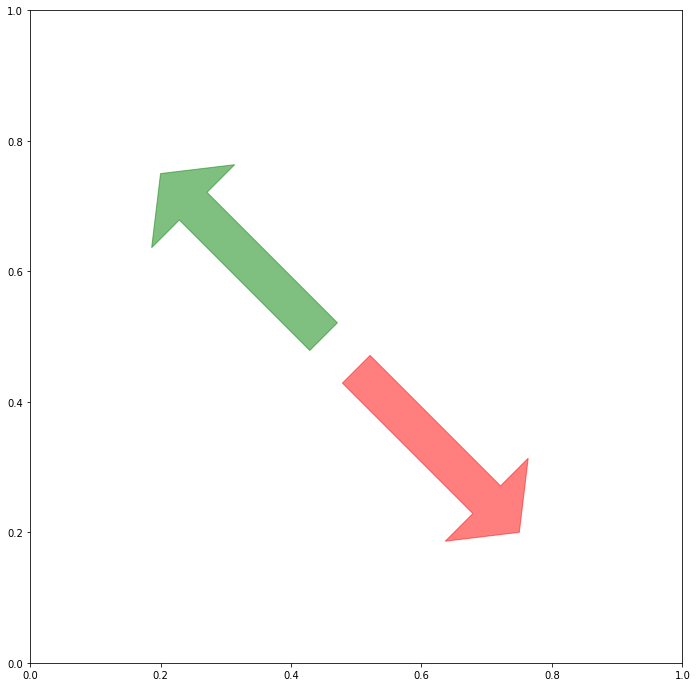

In [21]:
import matplotlib.pylab as plt
from scipy import interp
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
import matplotlib.patches as patches
import numpy as np # linear algebra
import pandas as pd 
from subprocess import check_output
from sklearn import svm, datasets
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

df = pd.read_csv("cleve.mod", sep = "\s+", header=None)
df = df.iloc[: , :-1] #drop last column of df
df.columns = ["age", "sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","class"]



df.head()
df.isna().sum()
l1 = LabelEncoder()
df = df.apply(l1.fit_transform)


print(df)

fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
x = df.loc[:, df.columns != 'class']
y = df.iloc[:,-1:]
clf = svm.SVC(kernel='poly', degree=5, C=1, probability=True)
cv = StratifiedKFold(n_splits=5,shuffle=False)



In [24]:
for train,test in cv.split(x,y):
    prediction = clf.fit(x.iloc[train],y.iloc[train]).predict_proba(x.iloc[test])
    print(prediction)
    fpr, tpr, t = roc_curve(y[test], prediction[:,0])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

[[0.38088155 0.61911845]
 [0.11433092 0.88566908]
 [0.42271833 0.57728167]
 [0.51244029 0.48755971]
 [0.65011087 0.34988913]
 [0.616712   0.383288  ]
 [0.0835668  0.9164332 ]
 [0.88632528 0.11367472]
 [0.4282861  0.5717139 ]
 [0.48653636 0.51346364]
 [0.57802772 0.42197228]
 [0.47192029 0.52807971]
 [0.54978951 0.45021049]
 [0.64582289 0.35417711]
 [0.60873738 0.39126262]
 [0.51231573 0.48768427]
 [0.50751144 0.49248856]
 [0.40628786 0.59371214]
 [0.36431214 0.63568786]
 [0.5080721  0.4919279 ]
 [0.55445221 0.44554779]
 [0.94055427 0.05944573]
 [0.43497229 0.56502771]
 [0.58217487 0.41782513]
 [0.56507764 0.43492236]
 [0.3650973  0.6349027 ]
 [0.48294282 0.51705718]
 [0.87548272 0.12451728]
 [0.5666882  0.4333118 ]
 [0.72145251 0.27854749]
 [0.74018202 0.25981798]
 [0.56115828 0.43884172]
 [0.38132008 0.61867992]
 [0.27677474 0.72322526]
 [0.49408015 0.50591985]
 [0.50768479 0.49231521]
 [0.70051318 0.29948682]
 [0.38354324 0.61645676]
 [0.52452903 0.47547097]
 [0.89995321 0.10004679]


c:\users\students07\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


KeyError: "None of [Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,\n            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,\n            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,\n            51, 52, 53, 54, 55, 56, 57, 58, 59, 60],\n           dtype='int64')] are in the [columns]"